In [ ]:
pip install yfinance fastdtw numpy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512548 sha256=cd55dfd1c4484dbddfdbed6558656f00c7b59ef6e04a60996f5bb926080918d9
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
import yfinance as yf
import numpy as np
from fastdtw import fastdtw
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

def dtw_distance(stock_1, stock_2):

   # Computes the Dynamic Time Warping (DTW) distance between two stock time series.
   # The lower the result, the more similar the two stock patterns are.

   distance, _ = fastdtw(stock_1, stock_2)
   return float(distance)

In [ ]:
tickers = ["AAPL", "MSFT", "AMZN", "META", "GOOGL", "GOOG", "TSLA", "JPM", "JNJ", "V", "PG", "NVDA", "HD", "UNH", "PYPL"]
start_date = "2022-01-01"
end_date = "2023-01-01"

data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Close'].tolist() for ticker in tickers}

# Prepare data for our model
X = [data[ticker] for ticker in tickers]
y = tickers

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

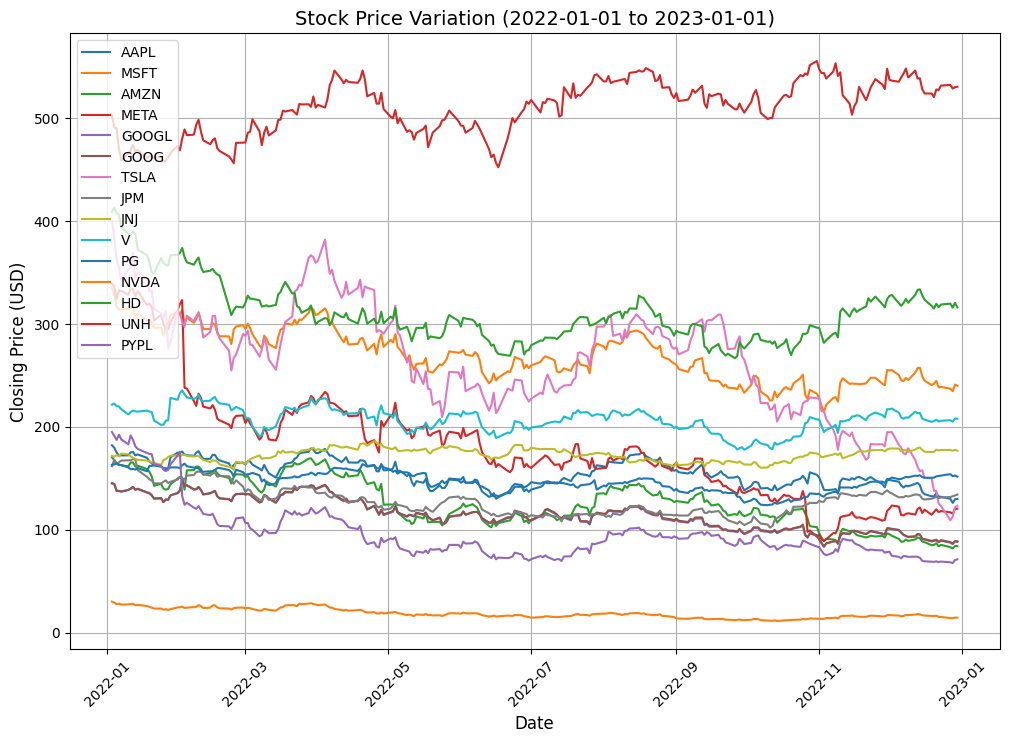

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Fetch the data again with dates as indices for better visualization
stock_data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Close'] for ticker in tickers}

# Convert the dictionary into a DataFrame for easier plotting
df = pd.DataFrame(stock_data)

# Plot stock price variations
plt.figure(figsize=(12, 8))
for ticker in tickers:
    plt.plot(df.index, df[ticker], label=ticker)

# Add labels and title
plt.title('Stock Price Variation (2022-01-01 to 2023-01-01)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
dtw_matrix = np.zeros((len(tickers), len(tickers)))
for i in range(len(tickers)):
   for j in range(len(tickers)):
       dtw_matrix[i, j] = dtw_distance(X[i], X[j])

print("\nHow Similar Are These Stocks?")
print(dtw_matrix)



How Similar Are These Stocks?
[[0.00000000e+00 2.86345899e+04 4.76207491e+03 7.23720053e+03
  9.12032864e+03 9.00672057e+03 2.59134032e+04 4.44752023e+03
  3.65009998e+03 1.30483900e+04 1.69261001e+03 3.42027920e+04
  3.90303900e+04 8.92001701e+04 1.23861798e+04]
 [2.86345899e+04 0.00000000e+00 3.58473864e+04 1.59112206e+04
  3.86933369e+04 3.85845664e+04 5.96191971e+03 3.53377899e+04
  2.41940299e+04 1.42587300e+04 3.05567799e+04 6.28373819e+04
  6.96271985e+03 6.05655801e+04 4.31509598e+04]
 [4.97670492e+03 3.58473864e+04 0.00000000e+00 1.01606255e+04
  2.01966538e+03 1.90489359e+03 3.17316062e+04 3.11489769e+03
  1.08319036e+04 2.03004264e+04 4.18066516e+03 2.69899955e+04
  4.62431864e+04 9.64129665e+04 2.39426135e+03]
 [7.32718057e+03 1.60060707e+04 1.01684160e+04 0.00000000e+00
  1.30258171e+04 1.29226941e+04 5.92991032e+03 8.19628996e+03
  1.00326202e+04 9.46698949e+03 9.45937914e+03 4.05663021e+04
  2.86262188e+04 8.28366599e+04 7.54863013e+03]
 [9.22919167e+03 3.86933369e+04 2

In [ ]:
import numpy as np
import pandas as pd

# Initialize the DTW matrix
dtw_matrix = np.zeros((len(tickers), len(tickers)))

# Fill the DTW matrix with distances
for i in range(len(tickers)):
    for j in range(len(tickers)):
        dtw_matrix[i, j] = dtw_distance(X[i], X[j])

# Convert the DTW matrix to a pandas DataFrame to include stock names as row and column labels
dtw_df = pd.DataFrame(dtw_matrix, index=tickers, columns=tickers)

# Print the DTW matrix with stock names
print("\nHow Similar Are These Stocks? (DTW Matrix)")
print(dtw_df)



How Similar Are These Stocks? (DTW Matrix)
               AAPL          MSFT          AMZN          META         GOOGL  \
AAPL       0.000000  28634.589928   4762.074905   7237.200531   9120.328636   
MSFT   28634.589928      0.000000  35847.386391  15911.220634  38693.336899   
AMZN    4976.704918  35847.386391      0.000000  10160.625488   2019.665382   
META    7327.180573  16006.070656  10168.415993      0.000000  13025.817116   
GOOGL   9229.191666  38693.336899   2034.329918  13099.830177      0.000000   
GOOG    9106.294998  38584.566422   1913.289589  12982.567169    114.778473   
TSLA   25466.543144   5946.316376  31009.151649   5905.126984  35085.114914   
JPM     4329.090279  35337.789932   3066.060188   8278.650002   2853.384926   
JNJ     3678.819969  24194.029938  10697.428566   9968.260155  14499.306961   
V      13035.309975  14553.389984  20300.426445   9466.989494  23146.376953   
PG      1670.399986  30556.779861   4180.735153   9522.469116   5666.899620   
NVDA   3

In [ ]:
import pandas as pd
import numpy as np

# Initialize the DTW matrix
dtw_matrix = np.zeros((len(tickers), len(tickers)))

# Fill the DTW matrix with distances
for i in range(len(tickers)):
    for j in range(len(tickers)):
        dtw_matrix[i, j] = dtw_distance(X[i], X[j])

# Create a DataFrame for better tabular representation
dtw_df = pd.DataFrame(dtw_matrix, index=tickers, columns=tickers)

# Convert DataFrame to a tab-separated string
dtw_string = dtw_df.to_csv(sep='\t', index=True)

# Print the tab-separated string
print(dtw_string)


	AAPL	MSFT	AMZN	META	GOOGL	GOOG	TSLA	JPM	JNJ	V	PG	NVDA	HD	UNH	PYPL
AAPL	0.0	28634.58992767334	4762.074905395508	7237.200531005859	9120.328636169434	9006.720573425293	25913.40322113037	4447.520225524902	3650.099983215332	13048.389976501465	1692.610008239746	34202.79198932648	39030.389976501465	89200.1700668335	12386.17977142334
MSFT	28634.58992767334	0.0	35847.386390686035	15911.22063446045	38693.33689880371	38584.56642150879	5961.919708251953	35337.78993225098	24194.02993774414	14258.730026245117	30556.779861450195	62837.38191699982	6962.7198486328125	60565.580139160156	43150.95980834961
AMZN	4976.704917907715	35847.386390686035	0.0	10160.62548828125	2019.665382385254	1904.8935852050781	31731.606170654297	3114.897689819336	10831.903648376465	20300.426445007324	4180.6651611328125	26989.99552631378	46243.18643951416	96412.96652984619	2394.2613525390625
META	7327.180572509766	16006.070655822754	10168.415992736816	0.0	13025.817115783691	12922.694122314453	5929.91032409668	8196.28995513916	

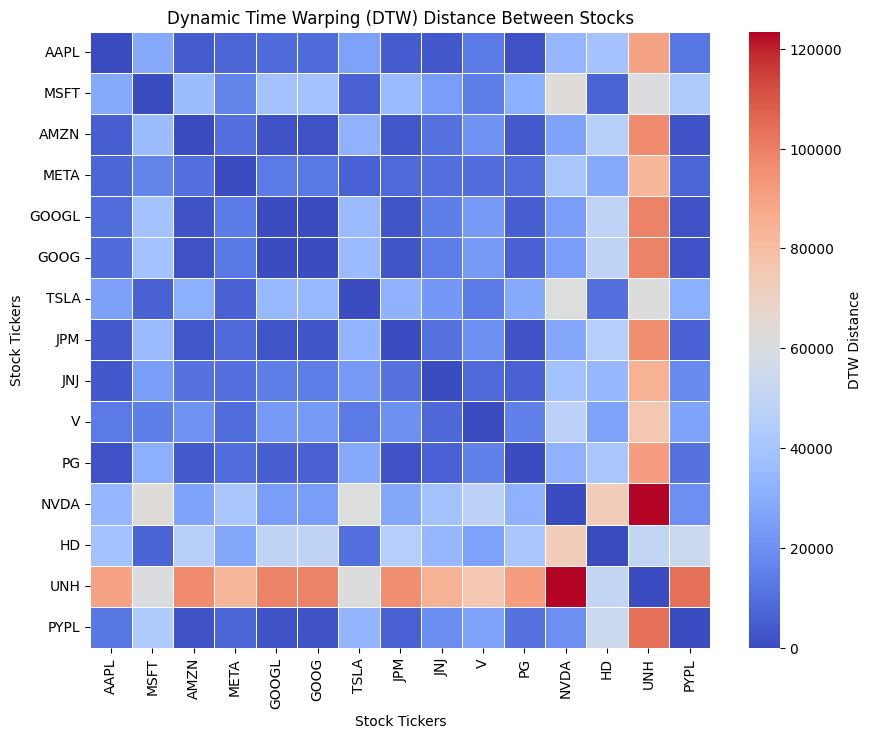

In [ ]:
# Enhanced Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dtw_matrix, xticklabels=tickers, yticklabels=tickers, cmap='coolwarm', annot=False, linewidths=0.5, cbar_kws={'label': 'DTW Distance'})
plt.title('Dynamic Time Warping (DTW) Distance Between Stocks')
plt.xlabel('Stock Tickers')
plt.ylabel('Stock Tickers')
plt.show()


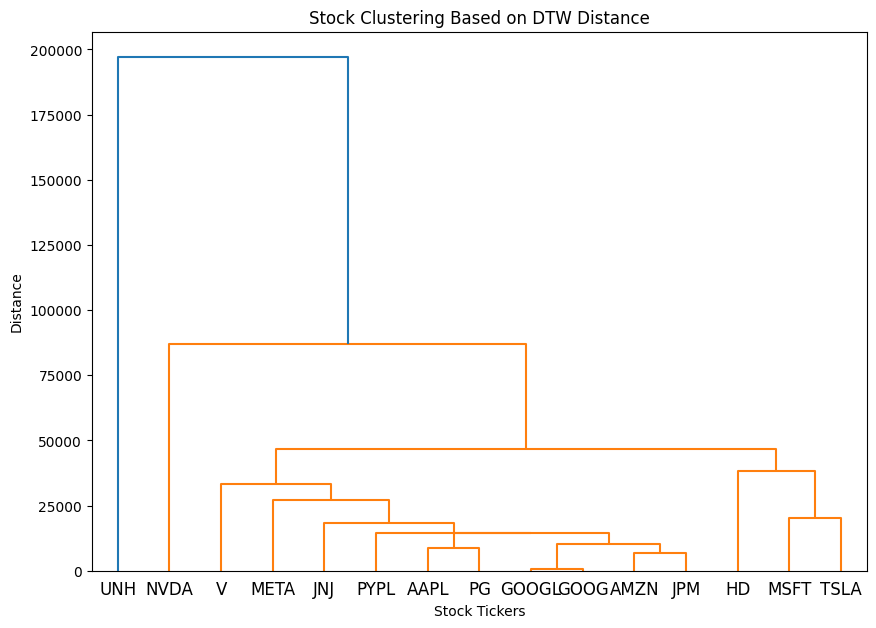

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Linkage for hierarchical clustering
linked = linkage(dtw_matrix, 'single')

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=tickers)
plt.title('Stock Clustering Based on DTW Distance')
plt.xlabel('Stock Tickers')
plt.ylabel('Distance')
plt.show()


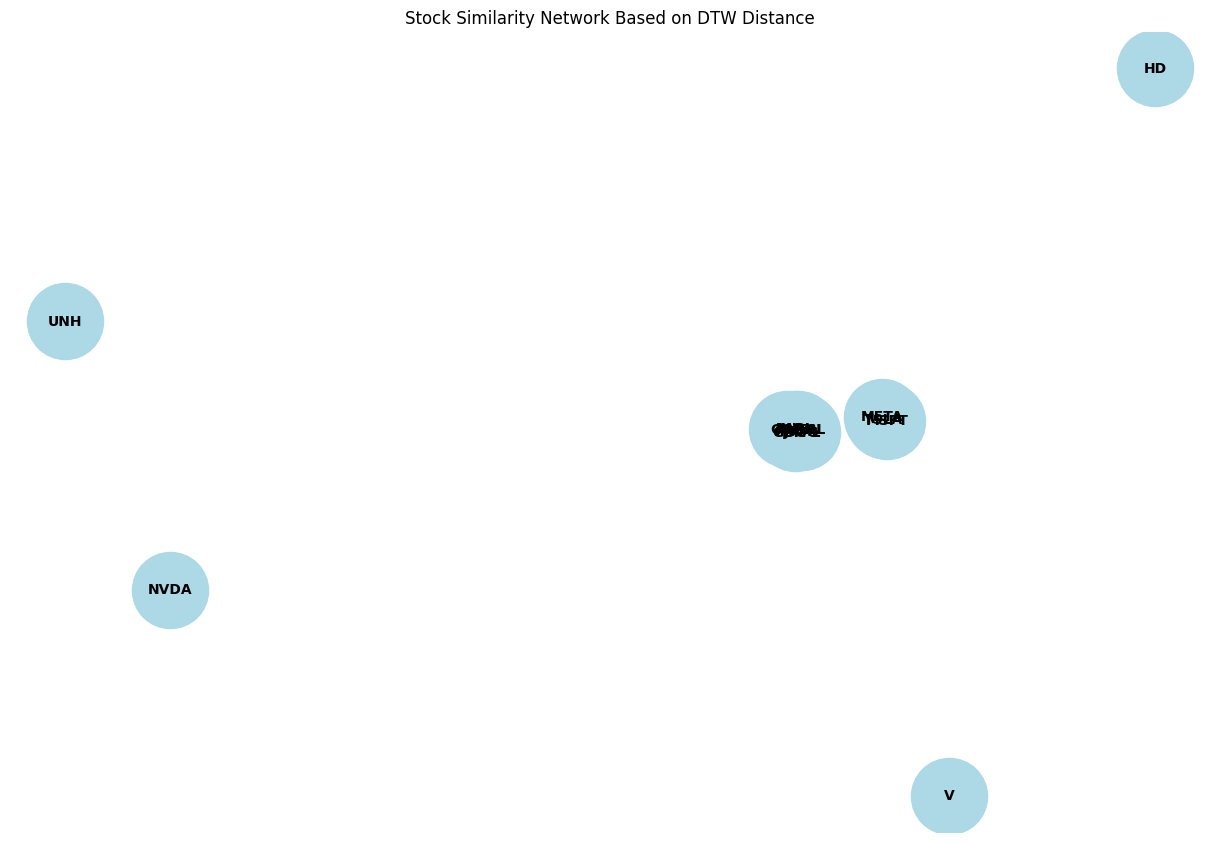

In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes
for ticker in tickers:
    G.add_node(ticker)

# Add edges based on DTW distance (you can set a threshold to only show significant similarities)
threshold = np.percentile(dtw_matrix, 25)  # Show top 25% most similar pairs
for i in range(len(tickers)):
    for j in range(i+1, len(tickers)):  # To avoid duplicating edges
        if dtw_matrix[i, j] < threshold:
            G.add_edge(tickers[i], tickers[j], weight=dtw_matrix[i, j])

# Plot the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
edges = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edges.items()}, font_color='red')
plt.title('Stock Similarity Network Based on DTW Distance')
plt.show()


In [ ]:
# Using K-nearest neighbors with our DTW distance metric to find the most similar stocks.
knn = KNeighborsClassifier(metric=dtw_distance)

# Using KFold to split our data into parts (or "folds") for cross-validation.
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Let's try different values for K (number of neighbors) to find the best one.
param_grid = {'n_neighbors': list(range(1, min(len(tickers)-1, 10)))}

# GridSearchCV will try out each value of K and tell us the best one.
grid_search = GridSearchCV(knn, param_grid, cv=cv)
grid_search.fit(X, y)

print(f"\nBest Number of Neighbors: {grid_search.best_params_['n_neighbors']}")



Best Number of Neighbors: 1


In [ ]:
distances, neighbors_idx = grid_search.best_estimator_.kneighbors(X, 2)
for i, ticker in enumerate(tickers):
   print(f"\n{ticker}'s closest neighbour is {tickers[neighbors_idx[i][1]]} with a similarity score of {distances[i][1]}.")



AAPL's closest neighbour is PG with a similarity score of 1692.610008239746.

MSFT's closest neighbour is TSLA with a similarity score of 5961.919708251953.

AMZN's closest neighbour is GOOG with a similarity score of 1904.8935852050781.

META's closest neighbour is TSLA with a similarity score of 5929.91032409668.

GOOGL's closest neighbour is GOOG with a similarity score of 114.77847290039062.

GOOG's closest neighbour is GOOGL with a similarity score of 114.77847290039062.

TSLA's closest neighbour is META with a similarity score of 5905.126983642578.

JPM's closest neighbour is PG with a similarity score of 1971.1000518798828.

JNJ's closest neighbour is AAPL with a similarity score of 3678.819969177246.

V's closest neighbour is JNJ with a similarity score of 8133.600006103516.

PG's closest neighbour is AAPL with a similarity score of 1670.3999862670898.

NVDA's closest neighbour is PYPL with a similarity score of 19686.422108650208.

HD's closest neighbour is MSFT with a simila

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

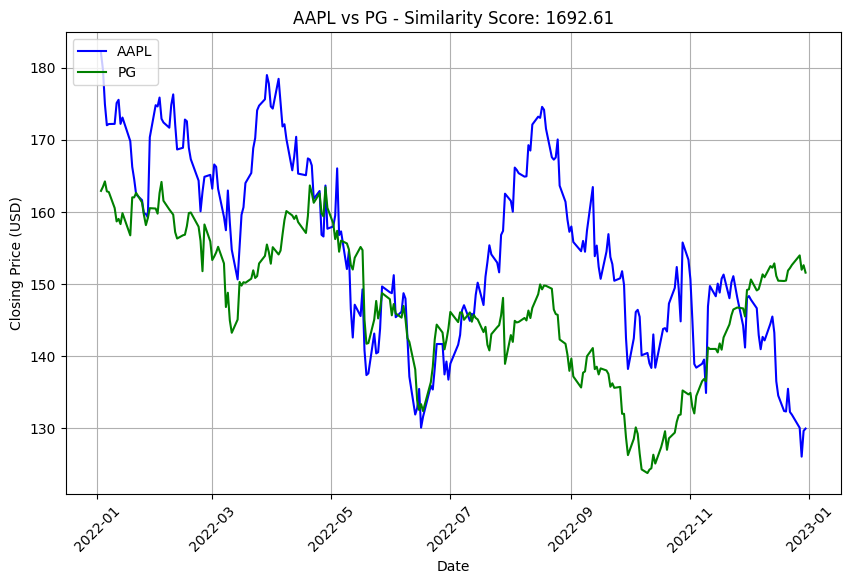

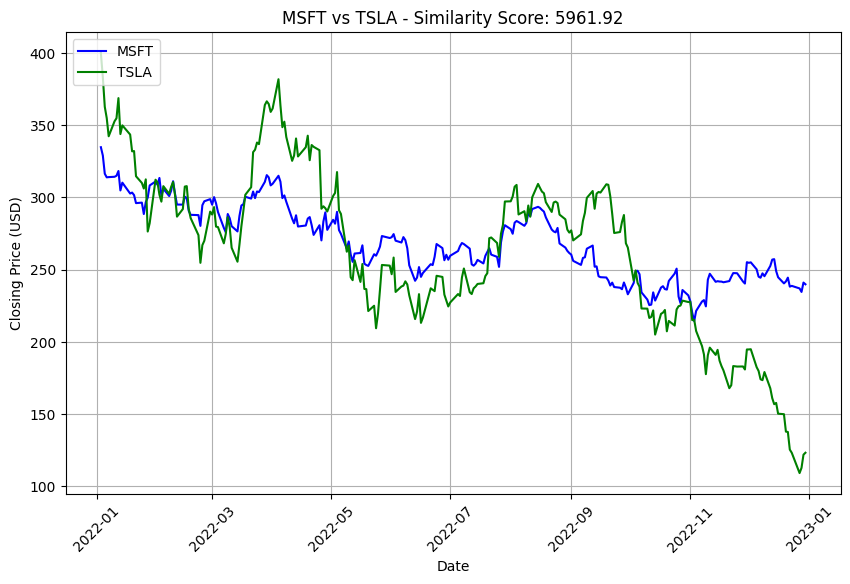

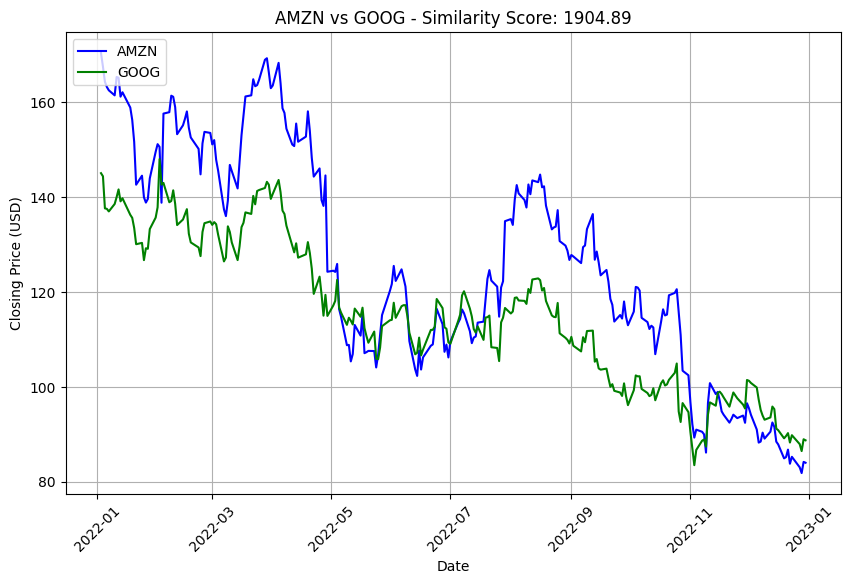

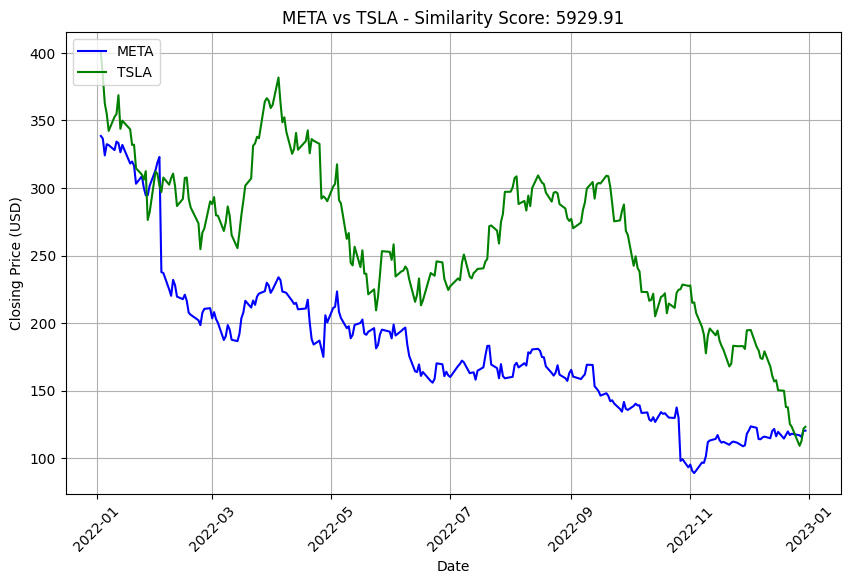

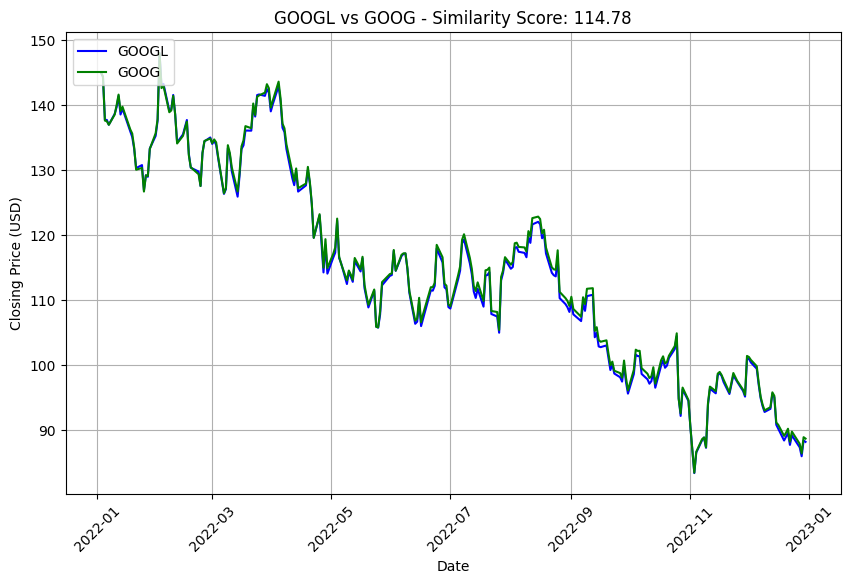

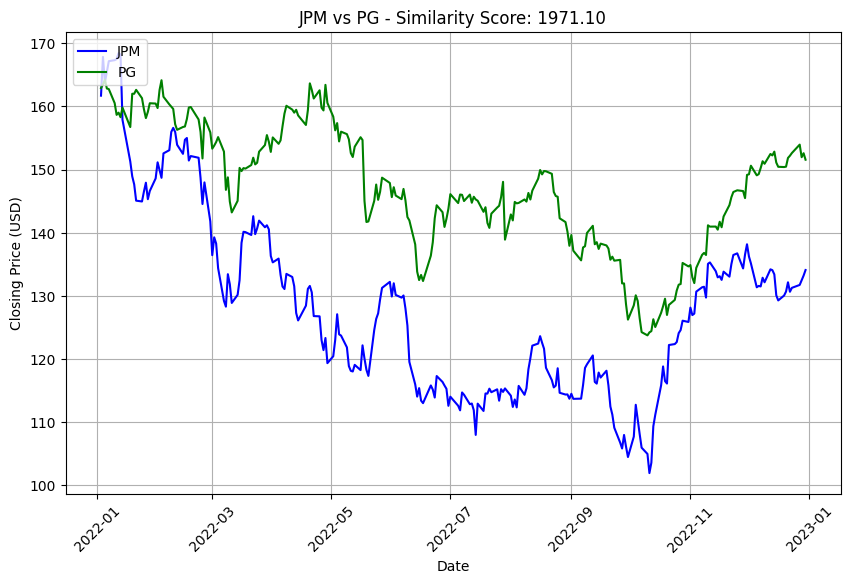

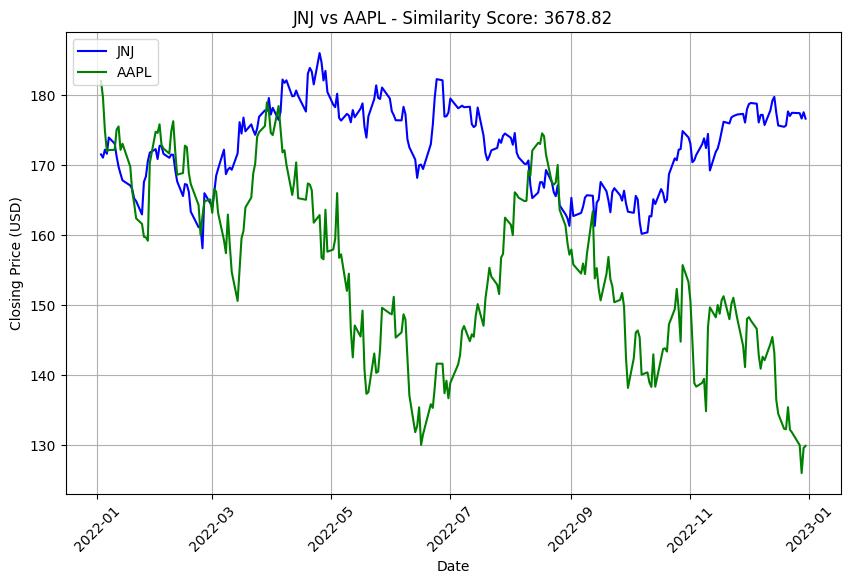

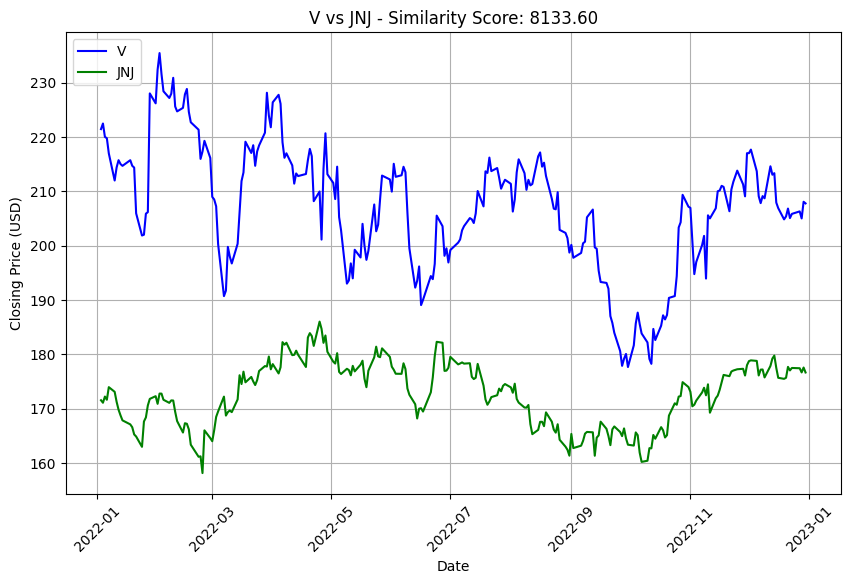

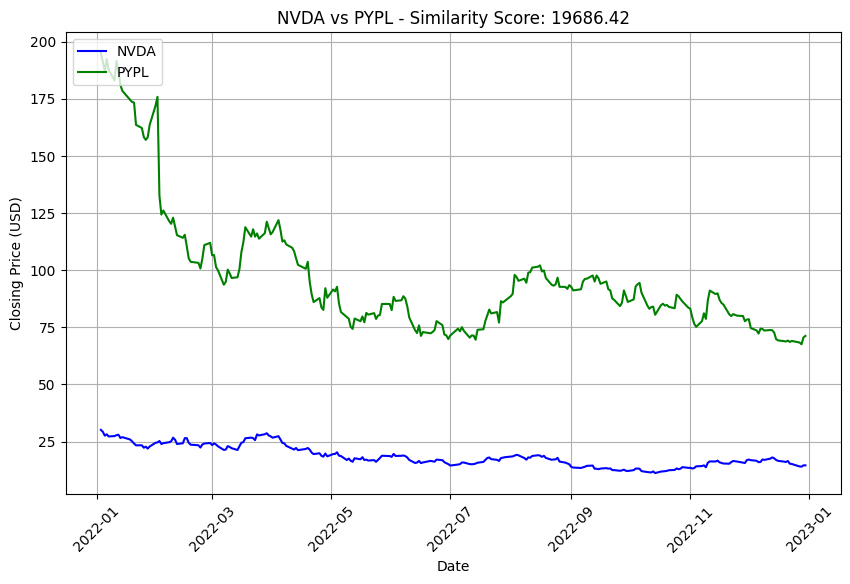

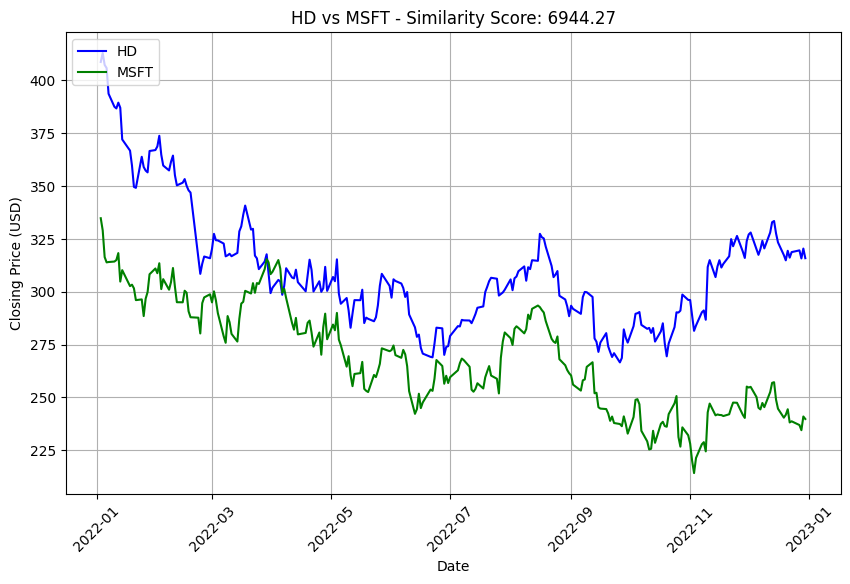

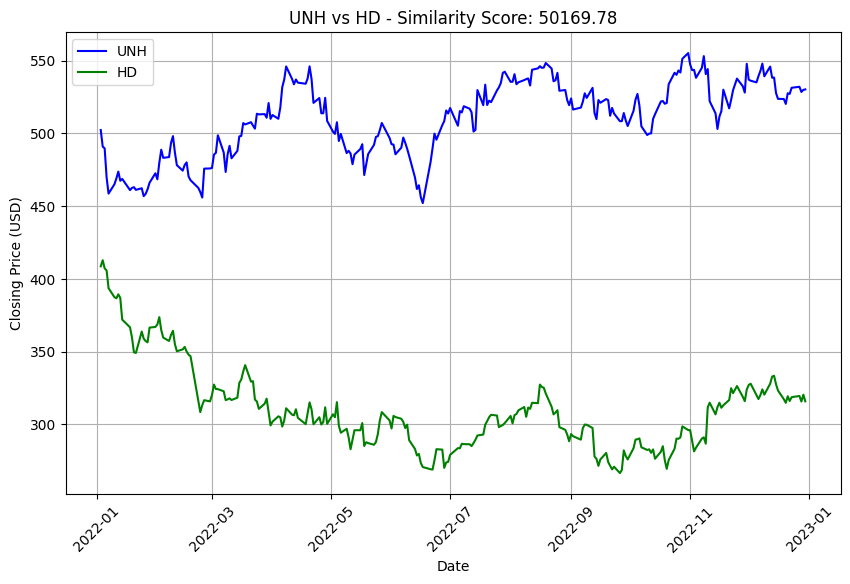

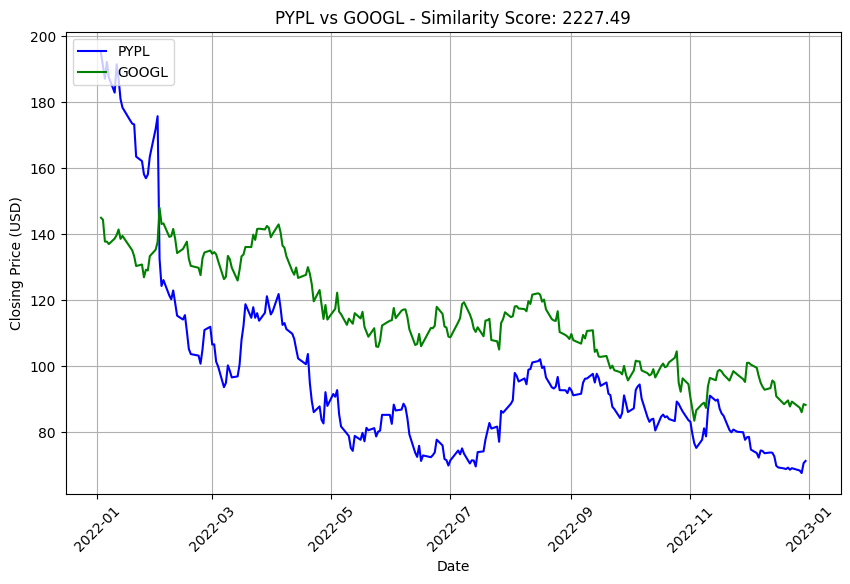

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Fetch stock data again with dates for plotting
stock_data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Close'] for ticker in tickers}
df = pd.DataFrame(stock_data)

# Function to plot stock prices of two similar stocks
def plot_similar_stocks(ticker1, ticker2, similarity_score):
    plt.figure(figsize=(10, 6))

    # Plot the two stocks' closing prices
    plt.plot(df.index, df[ticker1], label=ticker1, color='blue')
    plt.plot(df.index, df[ticker2], label=ticker2, color='green')

    # Add title and labels
    plt.title(f"{ticker1} vs {ticker2} - Similarity Score: {similarity_score:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Show plot
    plt.show()

# Pairs from your KNN output
similar_pairs = [
    ("AAPL", "PG", 1692.61),
    ("MSFT", "TSLA", 5961.92),
    ("AMZN", "GOOG", 1904.89),
    ("META", "TSLA", 5929.91),
    ("GOOGL", "GOOG", 114.78),
    ("JPM", "PG", 1971.10),
    ("JNJ", "AAPL", 3678.82),
    ("V", "JNJ", 8133.60),
    ("NVDA", "PYPL", 19686.42),
    ("HD", "MSFT", 6944.27),
    ("UNH", "HD", 50169.78),
    ("PYPL", "GOOGL", 2227.49)
]

# Iterate through similar pairs and plot their graphs
for ticker1, ticker2, similarity_score in similar_pairs:
    plot_similar_stocks(ticker1, ticker2, similarity_score)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

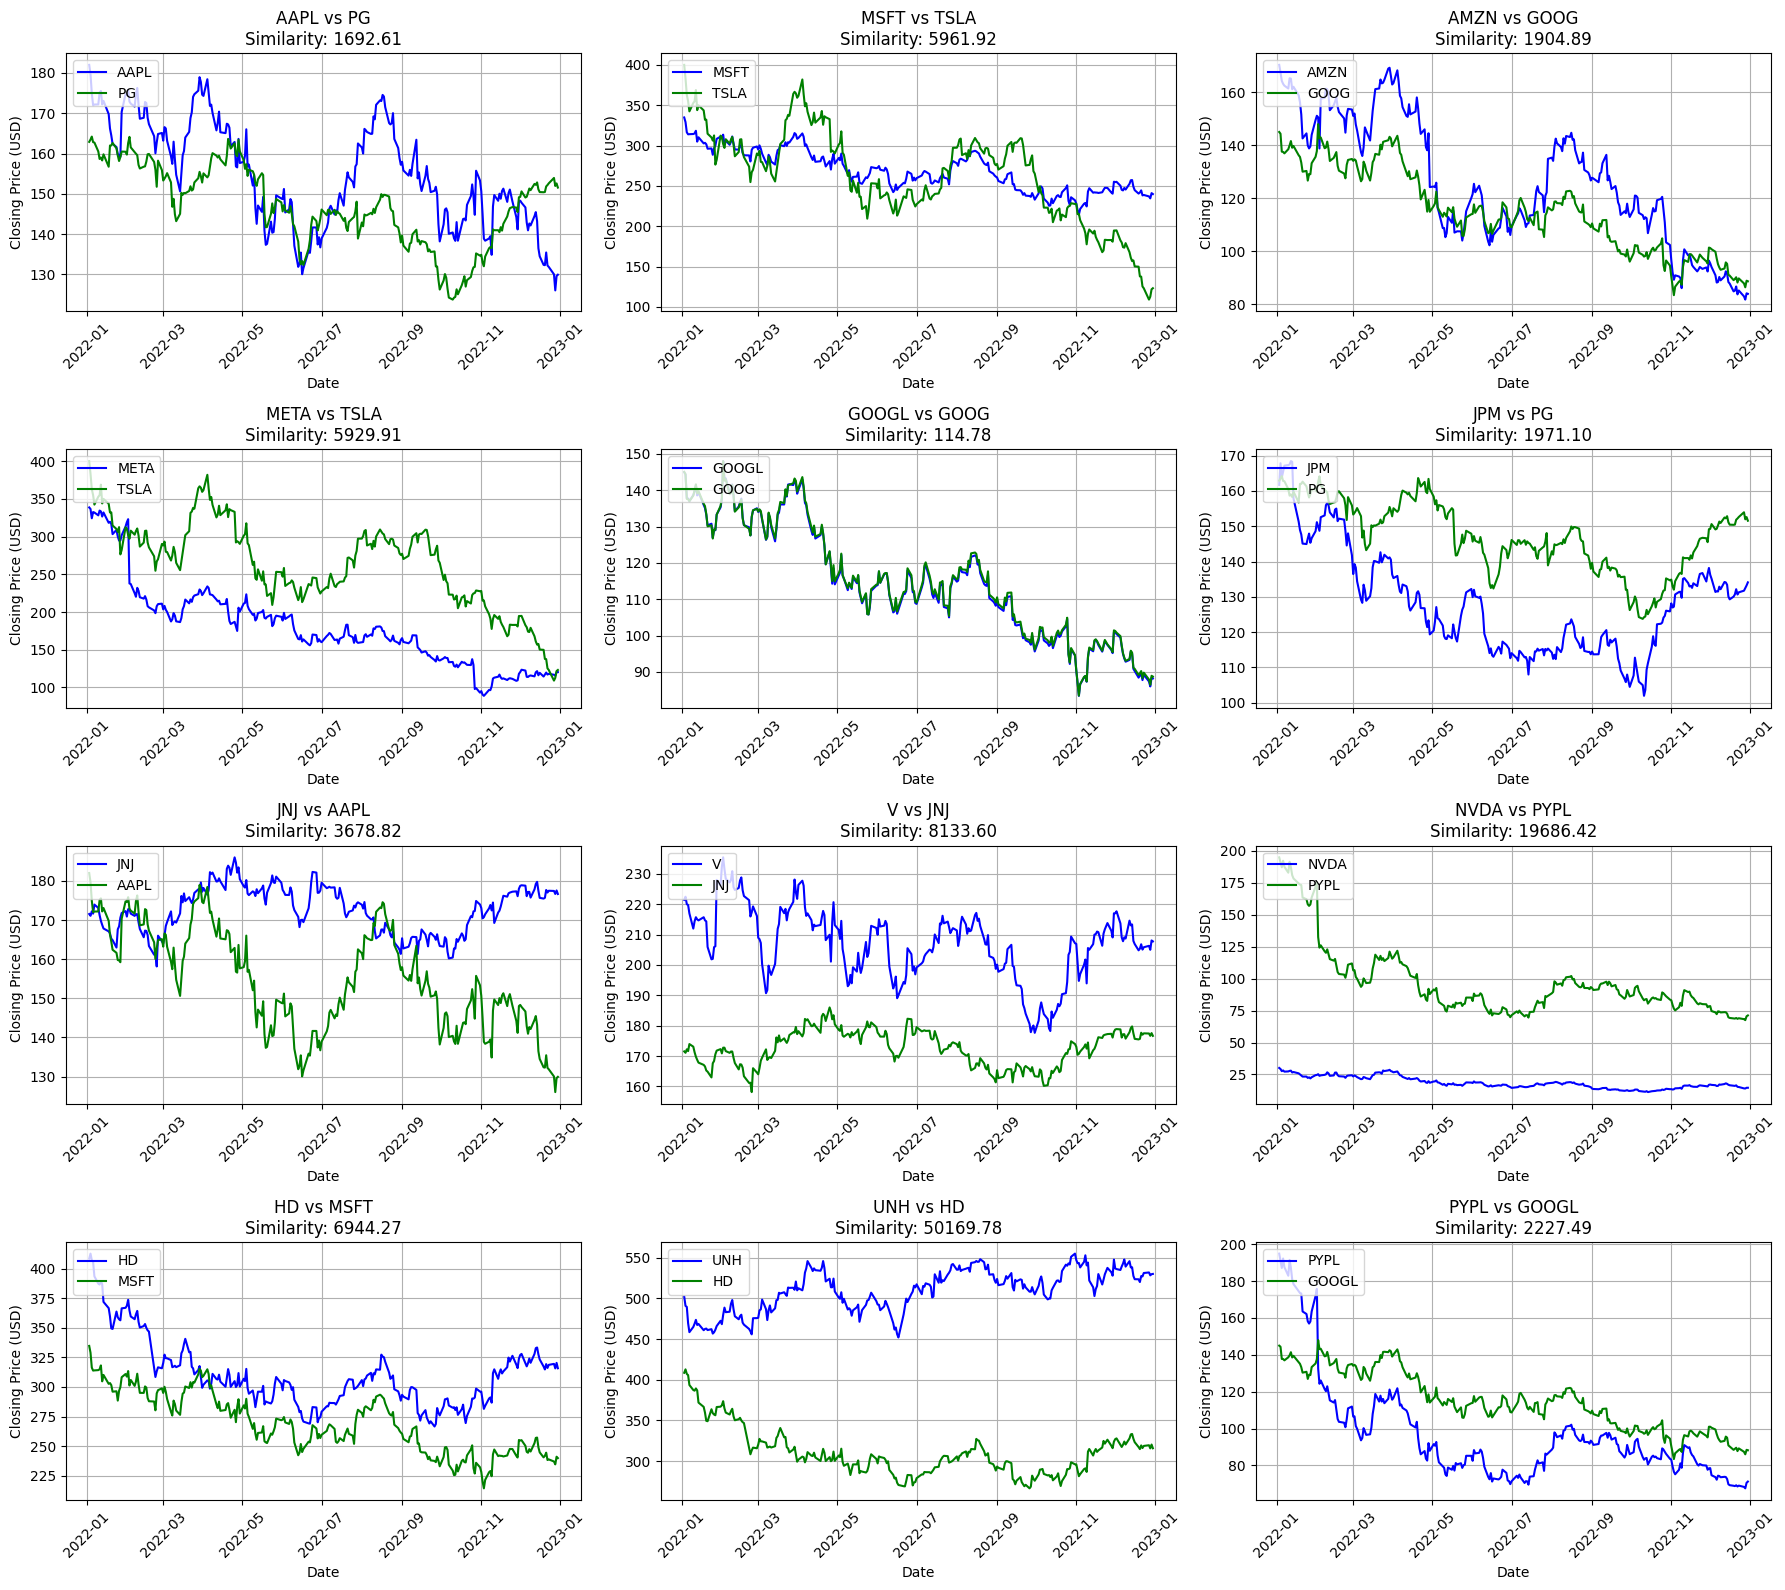

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# Fetch stock data again with dates for plotting
stock_data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Close'] for ticker in tickers}
df = pd.DataFrame(stock_data)

# Function to plot stock prices of two similar stocks in a subplot
def plot_similar_stocks(ax, ticker1, ticker2, similarity_score):
    ax.plot(df.index, df[ticker1], label=ticker1, color='blue')
    ax.plot(df.index, df[ticker2], label=ticker2, color='green')

    ax.set_title(f"{ticker1} vs {ticker2}\nSimilarity: {similarity_score:.2f}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price (USD)')
    ax.legend(loc='upper left')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Pairs from your KNN output
similar_pairs = [
    ("AAPL", "PG", 1692.61),
    ("MSFT", "TSLA", 5961.92),
    ("AMZN", "GOOG", 1904.89),
    ("META", "TSLA", 5929.91),
    ("GOOGL", "GOOG", 114.78),
    ("JPM", "PG", 1971.10),
    ("JNJ", "AAPL", 3678.82),
    ("V", "JNJ", 8133.60),
    ("NVDA", "PYPL", 19686.42),
    ("HD", "MSFT", 6944.27),
    ("UNH", "HD", 50169.78),
    ("PYPL", "GOOGL", 2227.49)
]

# Plot 3 graphs per row
rows = len(similar_pairs) // 3 + (len(similar_pairs) % 3 != 0)  # Determine the number of rows
fig, axes = plt.subplots(rows, 3, figsize=(18, 4 * rows))  # 3 plots per row

# Flatten axes to make it easy to index
axes = axes.flatten()

# Iterate through similar pairs and plot their graphs
for i, (ticker1, ticker2, similarity_score) in enumerate(similar_pairs):
    plot_similar_stocks(axes[i], ticker1, ticker2, similarity_score)

# Remove any unused subplots
for i in range(len(similar_pairs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

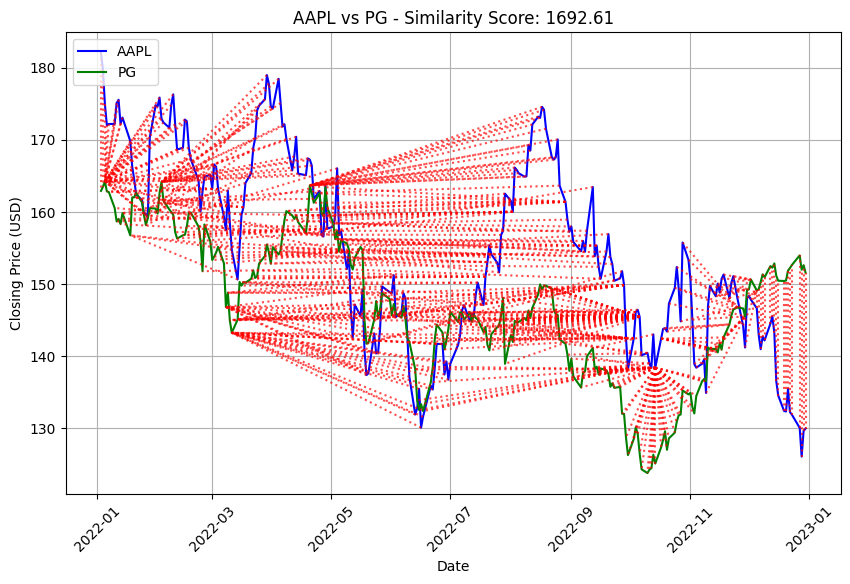

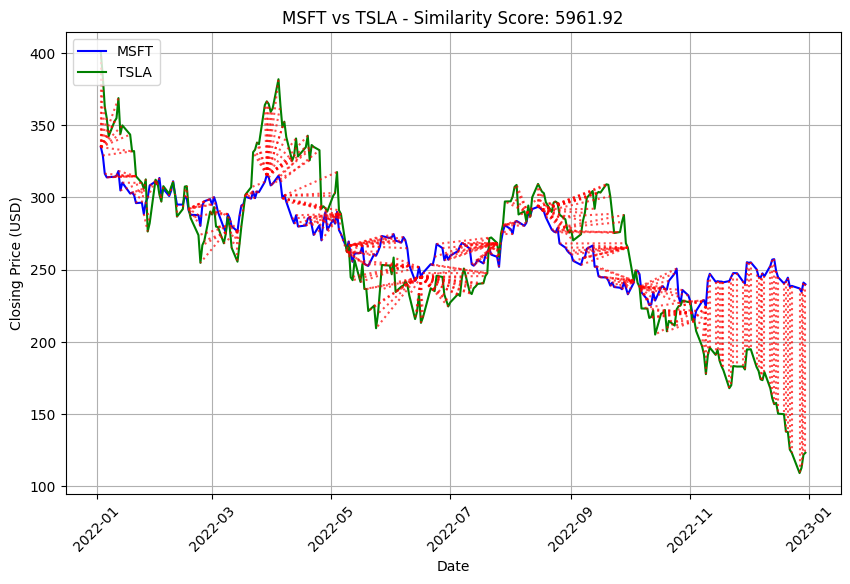

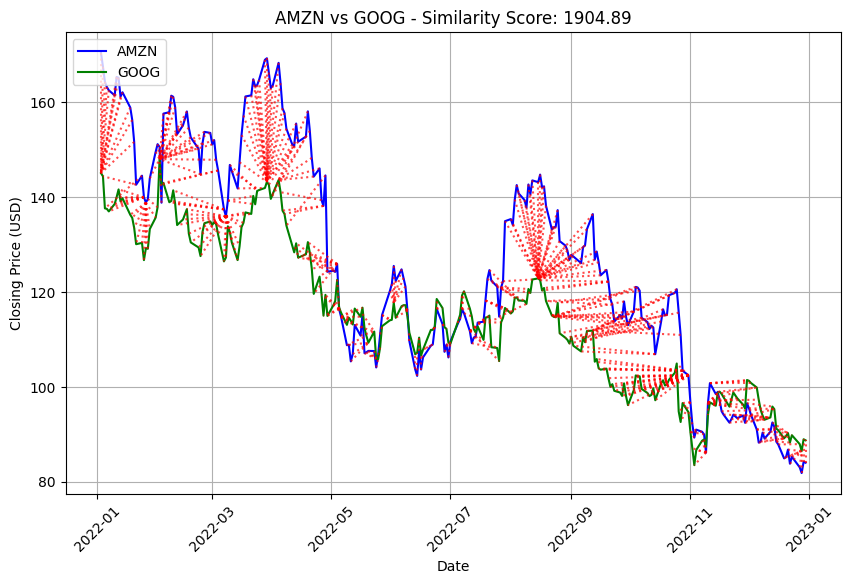

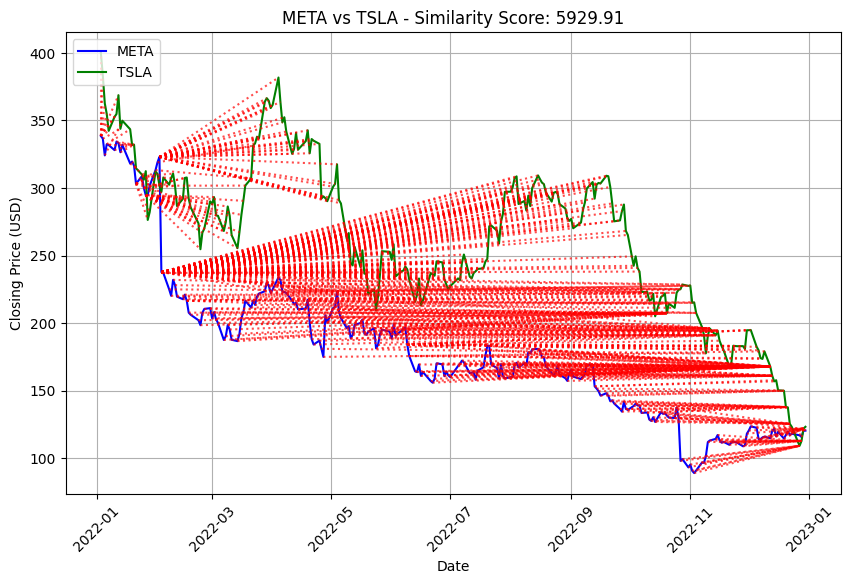

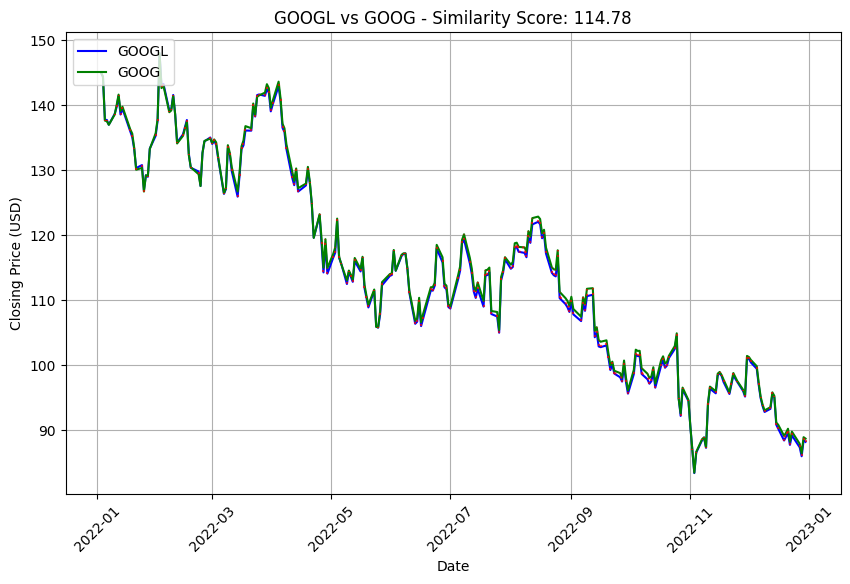

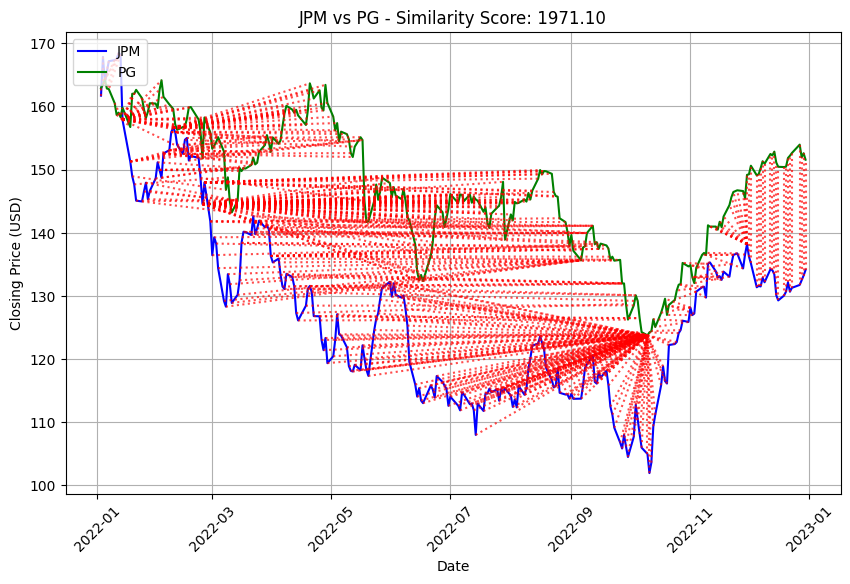

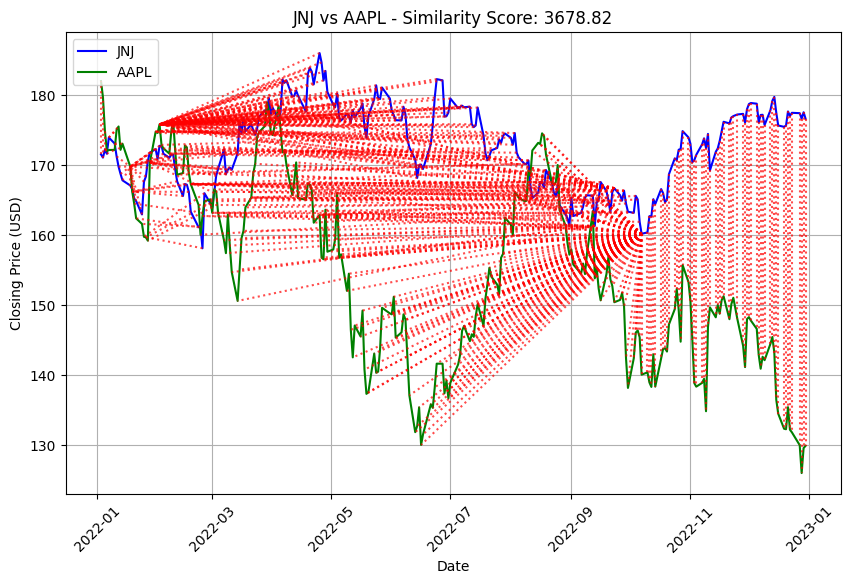

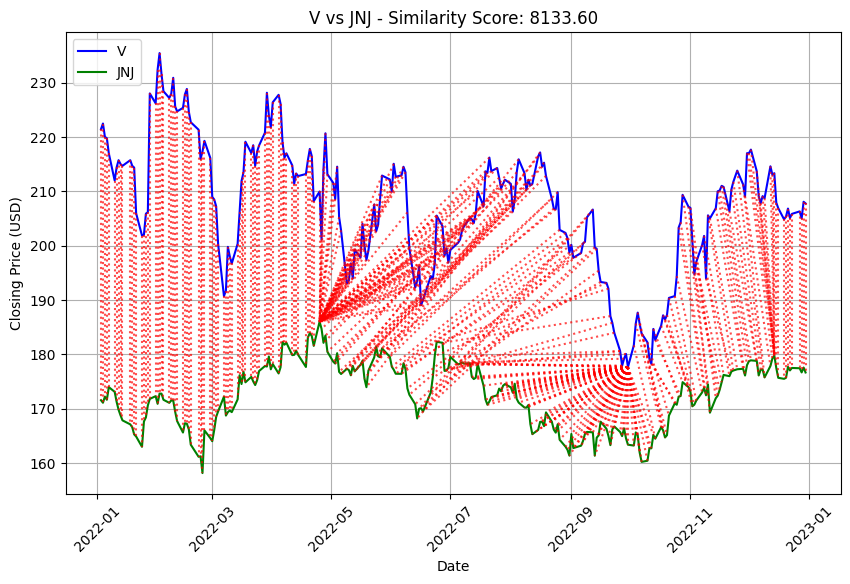

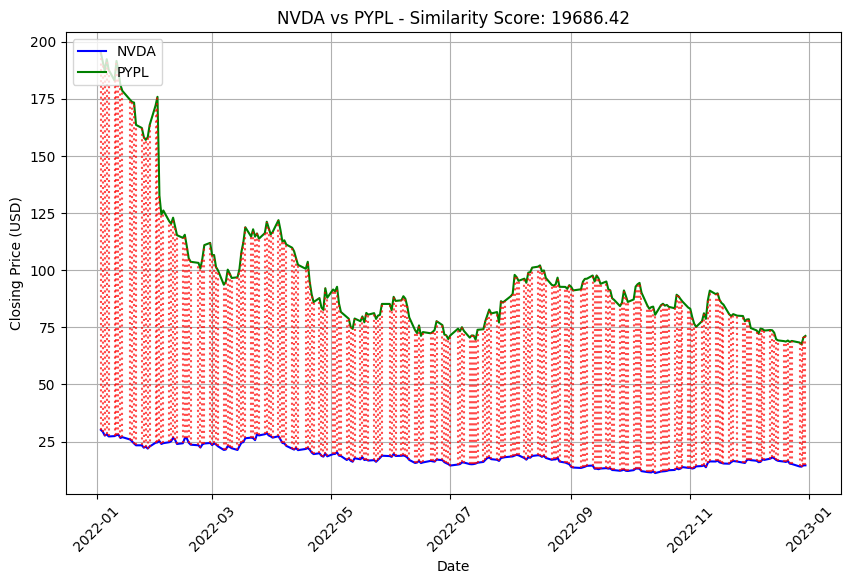

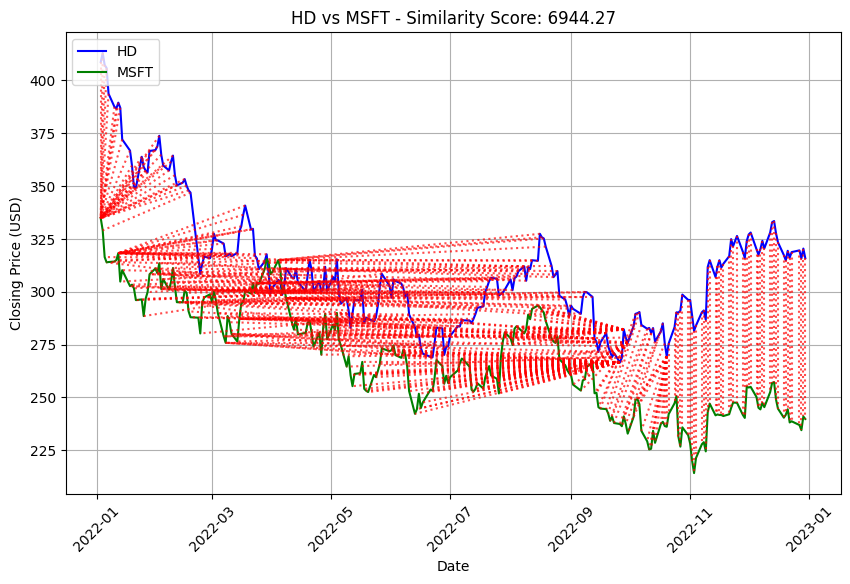

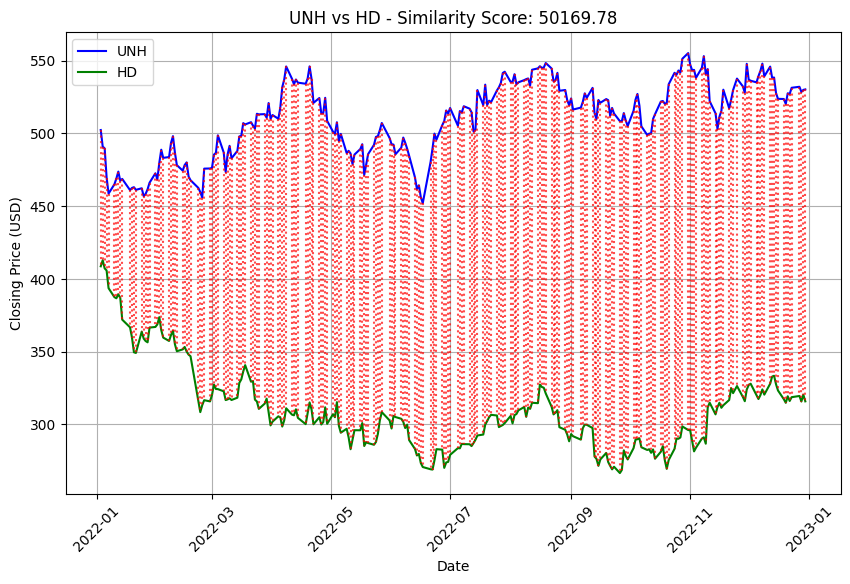

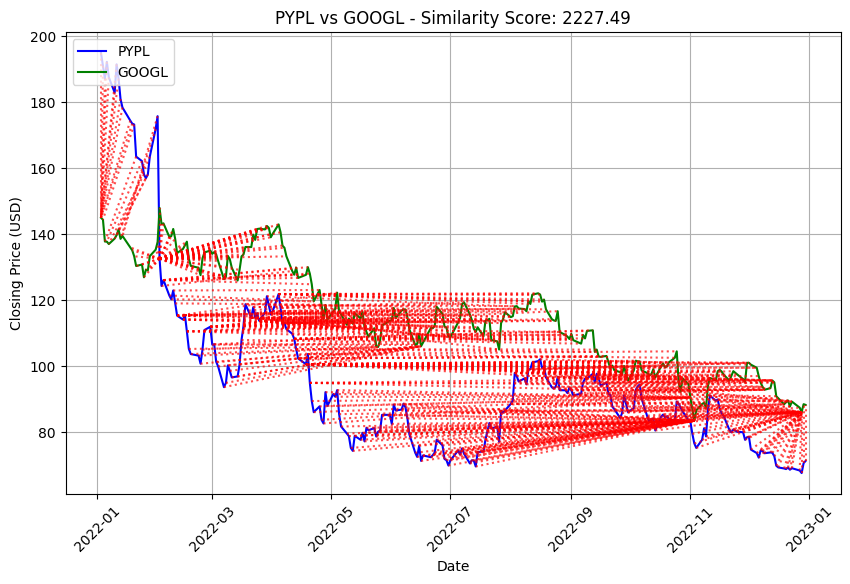

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw
import yfinance as yf
import pandas as pd

# Function to compute DTW distance and return the alignment path
def dtw_alignment(stock_1, stock_2):
    distance, path = fastdtw(stock_1, stock_2)
    return distance, path

# Fetch stock data again with dates for plotting
stock_data = {ticker: yf.download(ticker, start=start_date, end=end_date)['Close'] for ticker in tickers}
df = pd.DataFrame(stock_data)

# Function to plot stock prices of two similar stocks and highlight alignment points
def plot_similar_stocks_with_dtw(ticker1, ticker2, similarity_score):
    plt.figure(figsize=(10, 6))

    # Get the data for the two stocks
    stock1_data = df[ticker1].values
    stock2_data = df[ticker2].values

    # Perform DTW and get the alignment path
    distance, path = dtw_alignment(stock1_data, stock2_data)

    # Plot the two stocks' closing prices
    plt.plot(df.index, stock1_data, label=ticker1, color='blue')
    plt.plot(df.index, stock2_data, label=ticker2, color='green')

    # Plot the aligned points (path) where similarity occurs
    for (i, j) in path:
        plt.plot([df.index[i], df.index[j]], [stock1_data[i], stock2_data[j]], color='red', linestyle='dotted', alpha=0.7)

    # Add title and labels
    plt.title(f"{ticker1} vs {ticker2} - Similarity Score: {similarity_score:.2f}")
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Show plot
    plt.show()

# Pairs from your KNN output
similar_pairs = [
    ("AAPL", "PG", 1692.61),
    ("MSFT", "TSLA", 5961.92),
    ("AMZN", "GOOG", 1904.89),
    ("META", "TSLA", 5929.91),
    ("GOOGL", "GOOG", 114.78),
    ("JPM", "PG", 1971.10),
    ("JNJ", "AAPL", 3678.82),
    ("V", "JNJ", 8133.60),
    ("NVDA", "PYPL", 19686.42),
    ("HD", "MSFT", 6944.27),
    ("UNH", "HD", 50169.78),
    ("PYPL", "GOOGL", 2227.49)
]

# Iterate through similar pairs and plot their graphs
for ticker1, ticker2, similarity_score in similar_pairs:
    plot_similar_stocks_with_dtw(ticker1, ticker2, similarity_score)


<ipython-input-12-8fe8d376b1af>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(unique_neighbors))
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


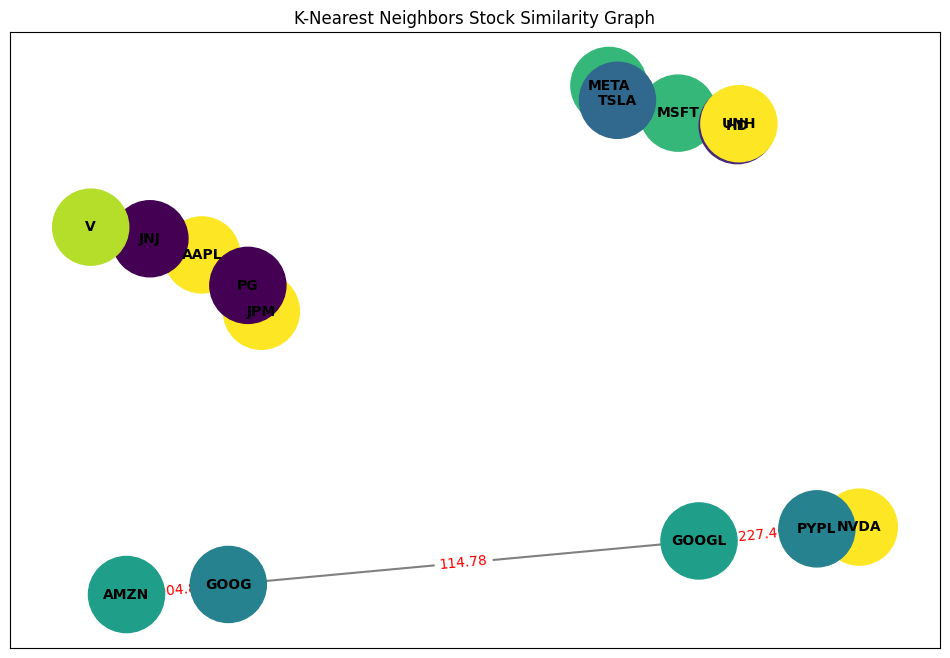

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm

# Get the number of clusters (unique neighbors)
unique_neighbors = list(set(neighbors_idx[:, 1]))

# Create a color map with a unique color for each neighbor cluster
cmap = cm.get_cmap('viridis', len(unique_neighbors))

# Create a graph
G = nx.Graph()

# Add nodes and assign each one a color based on their closest neighbor
node_colors = []
for i, ticker in enumerate(tickers):
    G.add_node(ticker)
    # The color is determined by the closest neighbor group
    node_colors.append(cmap(neighbors_idx[i][1] / len(unique_neighbors)))

# Add edges based on the similarity score (you can adjust the threshold if needed)
for i, ticker in enumerate(tickers):
    neighbor_ticker = tickers[neighbors_idx[i][1]]
    similarity_score = distances[i][1]
    G.add_edge(ticker, neighbor_ticker, weight=similarity_score)

# Plot the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout

# Draw nodes with assigned colors
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000, cmap='viridis')

# Draw edges (similarity connections)
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Show similarity scores on edges
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edges.items()}, font_color='red')

plt.title('K-Nearest Neighbors Stock Similarity Graph')
plt.show()
